#Credit Card Default Detection

## Following you will need to solve a Credit Card Default Detection Case

* Credit Card Default
    * To default is to fail to make a payment on a debt by the due date. If this happens with a credit card, creditors might raise interest rates to the default (or penalty rate) or decrease the line of credit. In case of serious delinquency, the card issuer can even take legal action to enforce payment or to garnish wages.

* Objective
    * Our objective for this project is, given the data set, we are going to build a machine learning model to predict whether a credit card is going to default

**Data Description:**

**id**: A unique Id field which represents a customer

**X1**: Credit line

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**X4**: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. 

**X6** = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.

**X12- X17**: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; 

**X19** = amount paid in August, 2015; 

**X23** = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the credit card is default (1) or not (0).

This is a real problem to classify multi-feature data into two groups.




**Hint for steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
5.	Choose the proper method to train the model:
6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",200)

# Data description

In [2]:
pro_3 = pd.read_csv("./raw_data.csv")
pro_3.head(10)

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,0,0,126027,129008,130376,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,0,0,133825,134495,133745,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,0,0,122017,121505,119522,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,0,0,0,0,0,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,-1,-1,1832,0,832,332,416,416,0,416,332,500,3500,832,0
5,6,210000,2,1,2,29,-1,-1,-1,-1,-1,2,871,27371,871,871,2042,1021,27371,871,871,2042,0,1666,0
6,7,250000,1,1,1,48,0,-1,-1,-1,0,-1,205323,5317,4898,19351,4858,6973,10021,5033,19619,4874,7050,12073,1
7,8,110000,1,3,1,54,0,0,0,0,0,0,105449,107957,82407,70562,70982,71609,4500,3786,2666,2900,3100,2856,0
8,9,60000,1,2,2,30,0,0,0,0,0,0,39264,41622,42627,43914,45053,46303,3000,2000,2000,2000,2000,2000,0
9,10,500000,1,1,1,53,-2,-2,-2,-2,-2,-2,13331,13307,15734,-101,27145,1479,13941,16392,470,27916,1994,12670,0


In [3]:
pro_3.shape

(25000, 25)

In [4]:
pro_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      25000 non-null  int64
 1   X1      25000 non-null  int64
 2   X2      25000 non-null  int64
 3   X3      25000 non-null  int64
 4   X4      25000 non-null  int64
 5   X5      25000 non-null  int64
 6   X6      25000 non-null  int64
 7   X7      25000 non-null  int64
 8   X8      25000 non-null  int64
 9   X9      25000 non-null  int64
 10  X10     25000 non-null  int64
 11  X11     25000 non-null  int64
 12  X12     25000 non-null  int64
 13  X13     25000 non-null  int64
 14  X14     25000 non-null  int64
 15  X15     25000 non-null  int64
 16  X16     25000 non-null  int64
 17  X17     25000 non-null  int64
 18  X18     25000 non-null  int64
 19  X19     25000 non-null  int64
 20  X20     25000 non-null  int64
 21  X21     25000 non-null  int64
 22  X22     25000 non-null  int64
 23  X23     250

In [5]:
temp1 = pro_3.iloc[:,12:18]
pro_3['X24']= temp1.mean(axis =1)
temp2 = pro_3.iloc[:,18:24]
pro_3['X25'] = temp2.mean(axis=1)
pro_3.head(10)

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,X24,X25
0,1,200000,2,3,1,53,0,0,0,0,0,0,126027,129008,130376,133207,136159,138741,6500,5000,5000,5100,5000,5400,0,132253.000000,5333.333333
1,2,130000,2,3,2,39,0,0,0,2,0,0,133825,134495,133745,130814,130758,123468,7500,10000,0,4500,4500,4179,0,131184.166667,5113.166667
2,3,350000,2,1,2,41,0,0,0,0,0,0,122017,121505,119522,119947,117328,118400,6000,5900,5800,4100,4500,5000,0,119786.500000,5216.666667
3,4,240000,2,2,1,43,1,-2,-2,-1,0,0,0,0,0,12700,12500,26225,0,0,12700,0,13725,0,0,8570.833333,4404.166667
4,5,180000,1,2,2,28,-1,-1,-1,-1,-1,-1,1832,0,832,332,416,416,0,416,332,500,3500,832,0,638.000000,930.000000
5,6,210000,2,1,2,29,-1,-1,-1,-1,-1,2,871,27371,871,871,2042,1021,27371,871,871,2042,0,1666,0,5507.833333,5470.166667
6,7,250000,1,1,1,48,0,-1,-1,-1,0,-1,205323,5317,4898,19351,4858,6973,10021,5033,19619,4874,7050,12073,1,41120.000000,9778.333333
7,8,110000,1,3,1,54,0,0,0,0,0,0,105449,107957,82407,70562,70982,71609,4500,3786,2666,2900,3100,2856,0,84827.666667,3301.333333
8,9,60000,1,2,2,30,0,0,0,0,0,0,39264,41622,42627,43914,45053,46303,3000,2000,2000,2000,2000,2000,0,43130.500000,2166.666667
9,10,500000,1,1,1,53,-2,-2,-2,-2,-2,-2,13331,13307,15734,-101,27145,1479,13941,16392,470,27916,1994,12670,0,11815.833333,12230.500000


In [6]:
pro_3.iloc[:,1:].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,X24,X25
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.0000,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,167559.187200,1.606760,1.853320,1.553200,35.481640,-0.020000,-0.137880,-0.169760,-0.2238,-0.266400,-0.292880,51164.179640,49152.436920,4.705701e+04,43266.200000,40289.261640,38842.113240,5642.769880,5.975874e+03,5231.979040,4873.475160,4793.889240,5248.531440,0.221920,44961.867340,5294.419813
std,129634.881264,0.488479,0.790892,0.521594,9.228484,1.118915,1.192898,1.193968,1.1641,1.131496,1.147638,73901.994909,71493.020192,6.988178e+04,64561.637962,60950.000675,59567.841188,15745.370388,2.293476e+04,16331.189806,15649.697239,15143.116895,17972.259959,0.415546,63444.442529,9600.406424
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.0000,-2.000000,-2.000000,-165580.000000,-69777.000000,-6.150600e+04,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-56043.166667,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,3543.500000,2936.750000,2.617750e+03,2307.000000,1740.000000,1247.750000,977.250000,8.360000e+02,390.000000,291.000000,263.250000,117.750000,0.000000,4699.125000,1105.500000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,22284.500000,20879.000000,1.997500e+04,18983.000000,18041.000000,17000.000000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000,20965.333333,2397.666667
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,66671.750000,63557.500000,5.983200e+04,53982.000000,49925.750000,49016.500000,5022.000000,5.000000e+03,4574.250000,4015.000000,4056.250000,4000.000000,0.000000,56846.666667,5638.625000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.0000,8.000000,8.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,508229.000000,528897.000000,426529.000000,528666.000000,1.000000,592431.833333,385692.000000


In [7]:
pro_3.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
X24    0
X25    0
dtype: int64

# Seperate catagorical and numerical features

In [8]:
for column in pro_3.columns:
    print(pro_3[column].value_counts())

1        1
16651    1
16673    1
16672    1
16671    1
        ..
8332     1
8331     1
8330     1
8329     1
25000    1
Name: id, Length: 25000, dtype: int64
50000     2819
20000     1646
30000     1321
80000     1286
200000    1280
150000     927
100000     883
180000     828
360000     730
60000      693
140000     629
210000     623
230000     616
70000      610
120000     606
500000     603
130000     579
160000     567
90000      549
240000     523
110000     483
300000     451
260000     451
170000     441
10000      414
280000     408
220000     392
250000     297
290000     294
320000     258
400000     232
310000     222
40000      201
270000     198
350000     196
190000     182
340000     181
390000     149
330000     144
420000     138
450000     136
380000     129
430000      75
470000      71
460000      69
440000      68
410000      66
480000      64
370000      54
490000      52
550000      17
510000      16
520000      16
600000      10
530000      10
620000       9
6

In [9]:
pro_3_catcol = [pro_3.loc[:,'id'],pro_3.loc[:, 'X2':'X4'],pro_3.loc[:,'X6':'X11'],pro_3.loc[:,'Y']]
cat_sub = pd.concat(pro_3_catcol, axis=1)
cat_sub.head(10)
#feature只有int或float类型，如何用code区别catergorical和numerical？已解决,但是，如果变量少，这种方法适合人工挑选分类，如果变量非常多，
#是否有code可以帮助自动分类？

,id,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
0,1,2,3,1,0,0,0,0,0,0,0
1,2,2,3,2,0,0,0,2,0,0,0
2,3,2,1,2,0,0,0,0,0,0,0
3,4,2,2,1,1,-2,-2,-1,0,0,0
4,5,1,2,2,-1,-1,-1,-1,-1,-1,0
5,6,2,1,2,-1,-1,-1,-1,-1,2,0
6,7,1,1,1,0,-1,-1,-1,0,-1,1
7,8,1,3,1,0,0,0,0,0,0,0
8,9,1,2,2,0,0,0,0,0,0,0
9,10,1,1,1,-2,-2,-2,-2,-2,-2,0


In [10]:
pro_3_numcol = [pro_3.loc[:,'id'],pro_3.loc[:,'X1'],pro_3.loc[:,'X5'],pro_3.loc[:,'X12':'X23']]
num_sub_p = pd.concat(pro_3_numcol,axis=1)
num_sub_p.head(10)

,id,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,200000,53,126027,129008,130376,133207,136159,138741,6500,5000,5000,5100,5000,5400
1,2,130000,39,133825,134495,133745,130814,130758,123468,7500,10000,0,4500,4500,4179
2,3,350000,41,122017,121505,119522,119947,117328,118400,6000,5900,5800,4100,4500,5000
3,4,240000,43,0,0,0,12700,12500,26225,0,0,12700,0,13725,0
4,5,180000,28,1832,0,832,332,416,416,0,416,332,500,3500,832
5,6,210000,29,871,27371,871,871,2042,1021,27371,871,871,2042,0,1666
6,7,250000,48,205323,5317,4898,19351,4858,6973,10021,5033,19619,4874,7050,12073
7,8,110000,54,105449,107957,82407,70562,70982,71609,4500,3786,2666,2900,3100,2856
8,9,60000,30,39264,41622,42627,43914,45053,46303,3000,2000,2000,2000,2000,2000
9,10,500000,53,13331,13307,15734,-101,27145,1479,13941,16392,470,27916,1994,12670


In [13]:
# seperate catergory and constinous code
cat_v = []
con_v = []
threshold = 15 #count number of each columns each values,set a threshold for catergory 
for c in pro_3.columns:
    if len(pro_3[c].value_counts().index) <= threshold:
        cat_v.append(c)
    else:
        con_v.append(c)
cat_v.remove('Y')
target = ['Y']

In [14]:
print("The continuous variables: ", con_v, "\n")
print("The categorical variables: ", cat_v)

The continuous variables:  ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25'] 

The categorical variables:  ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


# Test if numerical features are independent and not correlation, then dismiss strong correlation feature

In [15]:
#可以不用做 corr
corrnum = num_sub_p.iloc[:,1:].corr().abs()
corrnum

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.146040,0.287309,0.280592,0.286339,0.296105,0.297241,0.290695,0.206108,0.183218,0.216725,0.207212,0.217500,0.221568
X5,0.146040,1.000000,0.056721,0.054481,0.054400,0.050483,0.049132,0.048283,0.022077,0.020411,0.027147,0.022989,0.026681,0.019138
X12,0.287309,0.056721,1.000000,0.953280,0.891848,0.859735,0.828177,0.799414,0.149507,0.100359,0.150908,0.162488,0.157716,0.184665
X13,0.280592,0.054481,0.953280,1.000000,0.926157,0.889813,0.856223,0.828596,0.288755,0.101627,0.139564,0.149683,0.153842,0.175980
X14,0.286339,0.054400,0.891848,0.926157,1.000000,0.921408,0.880541,0.851158,0.254755,0.339935,0.130879,0.147199,0.183451,0.185457
X15,0.296105,0.050483,0.859735,0.889813,0.921408,1.000000,0.936712,0.897777,0.239665,0.209593,0.304090,0.126881,0.161757,0.182119
X16,0.297241,0.049132,0.828177,0.856223,0.880541,0.936712,1.000000,0.945379,0.219541,0.180056,0.244280,0.296810,0.141638,0.168347
X17,0.290695,0.048283,0.799414,0.828596,0.851158,0.897777,0.945379,1.000000,0.200899,0.172637,0.225067,0.256859,0.305616,0.115301
X18,0.206108,0.022077,0.149507,0.288755,0.254755,0.239665,0.219541,0.200899,1.000000,0.213567,0.195380,0.140462,0.160538,0.170909
X19,0.183218,0.020411,0.100359,0.101627,0.339935,0.209593,0.180056,0.172637,0.213567,1.000000,0.173175,0.114812,0.201817,0.148240


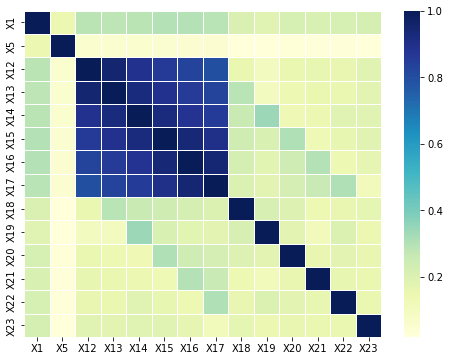

In [16]:
plt.figure(figsize = (8,6))
sns.heatmap(corrnum, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.show()

In [17]:
# move strong correlation feature
upper_tri = corrnum.where(np.triu(np.ones(corrnum.shape),k=1).astype(np.bool))
dropcols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
dropcols

/var/folders/ks/2h2pf76923j665_5l2ksy6mh0000gn/T/ipykernel_42511/1506682796.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrnum.where(np.triu(np.ones(corrnum.shape),k=1).astype(np.bool))


['X13']

In [18]:
num_sub = num_sub_p.drop(dropcols,axis=1)
num_sub.head(10)

,id,X1,X5,X12,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,200000,53,126027,130376,133207,136159,138741,6500,5000,5000,5100,5000,5400
1,2,130000,39,133825,133745,130814,130758,123468,7500,10000,0,4500,4500,4179
2,3,350000,41,122017,119522,119947,117328,118400,6000,5900,5800,4100,4500,5000
3,4,240000,43,0,0,12700,12500,26225,0,0,12700,0,13725,0
4,5,180000,28,1832,832,332,416,416,0,416,332,500,3500,832
5,6,210000,29,871,871,871,2042,1021,27371,871,871,2042,0,1666
6,7,250000,48,205323,4898,19351,4858,6973,10021,5033,19619,4874,7050,12073
7,8,110000,54,105449,82407,70562,70982,71609,4500,3786,2666,2900,3100,2856
8,9,60000,30,39264,42627,43914,45053,46303,3000,2000,2000,2000,2000,2000
9,10,500000,53,13331,15734,-101,27145,1479,13941,16392,470,27916,1994,12670


# Manipulate outlier data

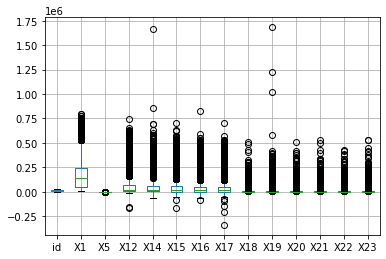

In [19]:
boxplot = num_sub.boxplot()

In [20]:
print("original num_sub shape:",num_sub.shape)
Q1 = num_sub.quantile(0.25)
Q3 = num_sub.quantile(0.75)
IQR = Q3 - Q1
num_sub_update_out = num_sub[~((num_sub< (Q1 - 1.5 * IQR)) |(num_sub > (Q3 + 1.5 *IQR))).any(axis=1)]
print("num_sub shape after the outlier remove:", num_sub_update_out.shape)

original num_sub shape: (25000, 14)
num_sub shape after the outlier remove: (16316, 14)


In [21]:
num_sub_update_out.head(10)

,id,X1,X5,X12,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
2,3,350000,41,122017,119522,119947,117328,118400,6000,5900,5800,4100,4500,5000
4,5,180000,28,1832,832,332,416,416,0,416,332,500,3500,832
7,8,110000,54,105449,82407,70562,70982,71609,4500,3786,2666,2900,3100,2856
8,9,60000,30,39264,42627,43914,45053,46303,3000,2000,2000,2000,2000,2000
10,11,30000,35,25601,26185,25470,25751,27179,2000,0,0,1000,2000,1000
11,12,220000,31,4935,5227,2291,4739,1640,3796,5227,2293,4739,1640,3012
17,18,100000,28,16601,11307,11139,11361,9816,1539,1124,495,500,758,0
20,21,120000,36,31218,32687,32972,33559,34604,2000,1600,1200,1500,2000,1500
22,23,20000,53,17614,19694,20004,20159,20059,2000,1000,1000,1000,1000,800
23,24,30000,25,3997,261,1261,772,390,0,261,1000,772,8,390


# Test if variance is normal distribution, how to do all features normal distributuon test and put output is a dataframe with 'p value' column?

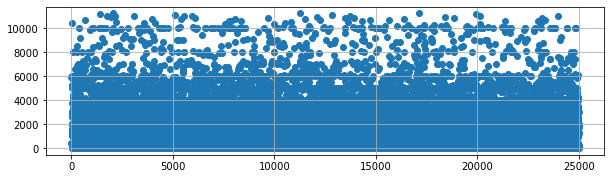

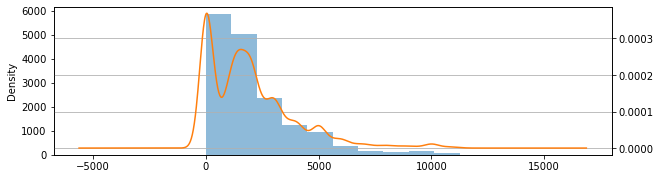

In [22]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(num_sub_update_out.index,num_sub_update_out['X19'].values)
plt.grid()

fig = plt.figure(figsize = (10,6))
ax2 = fig.add_subplot(2,1,2)
num_sub_update_out['X19'].hist(alpha =0.5,ax=ax2)
num_sub_update_out['X19'].plot(kind='kde',secondary_y = True, ax = ax2)
plt.grid()

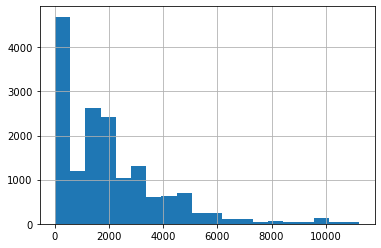

In [23]:
plt.hist(num_sub_update_out['X19'],bins=20)
plt.grid()
plt.show()

In [31]:
from scipy import stats
u = num_sub_update_out['X19'].iloc[1:].mean()
std = num_sub_update_out['X19'].iloc[1:].std()
stats.kstest(num_sub_update_out['X19'].iloc[1:],'norm',(u,std)) 
#P>0.05, normal distribution,一次只能做一个变量？

KstestResult(statistic=0.15857733207929442, pvalue=0.0)

# Merge treated dateframe into final anlysis data 

In [32]:
pro_3_new = cat_sub.merge(num_sub_update_out, on = 'id')
#pro_3_new.drop(['id'],axis = 1,inplace=True)
pro_3_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16316 entries, 0 to 16315
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      16316 non-null  int64
 1   X2      16316 non-null  int64
 2   X3      16316 non-null  int64
 3   X4      16316 non-null  int64
 4   X6      16316 non-null  int64
 5   X7      16316 non-null  int64
 6   X8      16316 non-null  int64
 7   X9      16316 non-null  int64
 8   X10     16316 non-null  int64
 9   X11     16316 non-null  int64
 10  Y       16316 non-null  int64
 11  X1      16316 non-null  int64
 12  X5      16316 non-null  int64
 13  X12     16316 non-null  int64
 14  X14     16316 non-null  int64
 15  X15     16316 non-null  int64
 16  X16     16316 non-null  int64
 17  X17     16316 non-null  int64
 18  X18     16316 non-null  int64
 19  X19     16316 non-null  int64
 20  X20     16316 non-null  int64
 21  X21     16316 non-null  int64
 22  X22     16316 non-null  int64
 23  X23     163

In [33]:
pro_3_new.head(10)

,id,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y,X1,X5,X12,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,3,2,1,2,0,0,0,0,0,0,0,350000,41,122017,119522,119947,117328,118400,6000,5900,5800,4100,4500,5000
1,5,1,2,2,-1,-1,-1,-1,-1,-1,0,180000,28,1832,832,332,416,416,0,416,332,500,3500,832
2,8,1,3,1,0,0,0,0,0,0,0,110000,54,105449,82407,70562,70982,71609,4500,3786,2666,2900,3100,2856
3,9,1,2,2,0,0,0,0,0,0,0,60000,30,39264,42627,43914,45053,46303,3000,2000,2000,2000,2000,2000
4,11,1,2,2,1,3,3,2,0,0,0,30000,35,25601,26185,25470,25751,27179,2000,0,0,1000,2000,1000
5,12,1,1,2,-2,-2,-2,-2,-2,-2,0,220000,31,4935,5227,2291,4739,1640,3796,5227,2293,4739,1640,3012
6,18,2,1,2,0,0,0,0,0,0,0,100000,28,16601,11307,11139,11361,9816,1539,1124,495,500,758,0
7,21,1,3,1,-1,0,0,0,0,0,0,120000,36,31218,32687,32972,33559,34604,2000,1600,1200,1500,2000,1500
8,23,1,3,1,0,0,2,0,0,0,1,20000,53,17614,19694,20004,20159,20059,2000,1000,1000,1000,1000,800
9,24,1,2,2,1,2,-1,0,-1,0,1,30000,25,3997,261,1261,772,390,0,261,1000,772,8,390


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'X3'}>,
        <AxesSubplot:title={'center':'X4'}>,
        <AxesSubplot:title={'center':'X6'}>],
       [<AxesSubplot:title={'center':'X7'}>,
        <AxesSubplot:title={'center':'X8'}>,
        <AxesSubplot:title={'center':'X9'}>,
        <AxesSubplot:title={'center':'X10'}>,
        <AxesSubplot:title={'center':'X11'}>],
       [<AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'X5'}>,
        <AxesSubplot:title={'center':'X12'}>,
        <AxesSubplot:title={'center':'X14'}>],
       [<AxesSubplot:title={'center':'X15'}>,
        <AxesSubplot:title={'center':'X16'}>,
        <AxesSubplot:title={'center':'X17'}>,
        <AxesSubplot:title={'center':'X18'}>,
        <AxesSubplot:title={'center':'X19'}>],
       [<AxesSubplot:title={'center':'X20'}>,
        <AxesSubplot:title={'center':'X21'

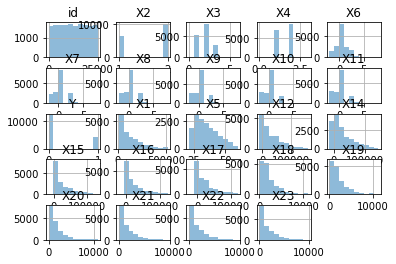

In [34]:
#fig = plt.figure(figsize = (10,6))
pro_3_new.hist(alpha = 0.5)
#plt.grid()
# Y is imbalance data, need to adjust?

<AxesSubplot:xlabel='Y'>

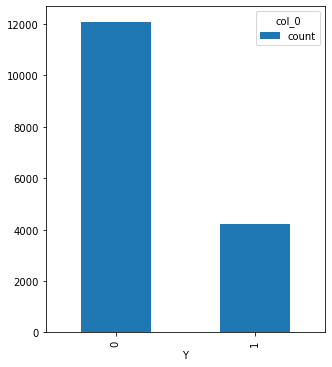

In [35]:
Y_table = pd.crosstab(index = pro_3_new['Y'], columns = 'count')
Y_table.plot(kind="bar",figsize=(5,6), rot = 90)

# construct model

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [37]:
cols = list(pro_3_new.columns)
cols[1:10]+cols[11:24]

['X2',
 'X3',
 'X4',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X1',
 'X5',
 'X12',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23']

In [38]:
feature_cols = cols[1:10]+cols[11:24]
pro_3_new[['X2', 'X3', 'X4','X6','X7','X8','X9','X10', 'X11','Y']]= pro_3_new[['X2', 'X3', 'X4','X6','X7','X8','X9','X10', 'X11','Y']].astype('category')
label = ['Y']
X = pro_3_new[feature_cols] # Features
y = pro_3_new[label] # target varible
##train_test = model_selection.train_test_split(pro_3_new, test_size = 0.3, random_state = 0)

In [39]:
pro_3_new.dtypes

id        int64
X2     category
X3     category
X4     category
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
Y      category
X1        int64
X5        int64
X12       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
dtype: object

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Penalized Models with RFC
RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print (metrics.classification_report(y_test, y_pred))

/var/folders/ks/2h2pf76923j665_5l2ksy6mh0000gn/T/ipykernel_42511/1818128807.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RF.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2395
           1       0.70      0.38      0.49       869

    accuracy                           0.79      3264
   macro avg       0.75      0.66      0.68      3264
weighted avg       0.78      0.79      0.77      3264



In [42]:
# instantiate the model (using imbalance adjust)
logreg = LogisticRegression(class_weight = {0:1, 1:3})
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(logreg.score(X,y))
print (metrics.classification_report(y_test, y_pred))

0.6579431233145379
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2395
           1       0.34      0.35      0.35       869

    accuracy                           0.65      3264
   macro avg       0.55      0.55      0.55      3264
weighted avg       0.65      0.65      0.65      3264



/Users/qi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
dt = DecisionTreeClassifier(class_weight = {0:1, 1:3})
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2395
           1       0.43      0.42      0.42       869

    accuracy                           0.70      3264
   macro avg       0.61      0.61      0.61      3264
weighted avg       0.70      0.70      0.70      3264



In [44]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.classification_report(y_test, y_pred))

/Users/qi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.75      0.88      0.81      2395
           1       0.38      0.20      0.26       869

    accuracy                           0.70      3264
   macro avg       0.57      0.54      0.54      3264
weighted avg       0.65      0.70      0.67      3264



# Evaluation model

In [45]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2116,  279],
       [ 697,  172]])

Text(0.5, 257.44, 'Predicted label')

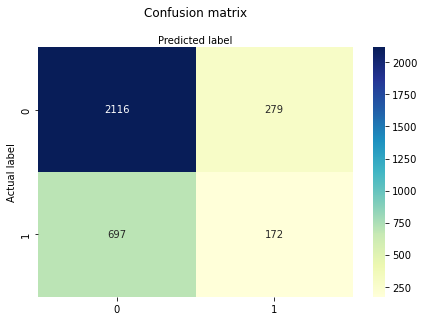

In [46]:
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(class_names,tick_marks)
plt.yticks(class_names,tick_marks)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7009803921568627
Precision: 0.38137472283813745
Recall: 0.19792865362485615
f1_score: 0.2606060606060606


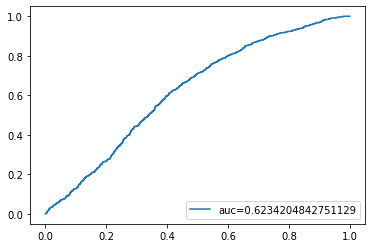

In [48]:
# auc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()